## Crypto Arbitrage

The code sorts through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. It applies the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.


In [309]:
# Import the required libraries

import pandas as pd
from pathlib import Path
%matplotlib inline

In [307]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path('./Resources/bitstamp.csv'),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True)

In [68]:
# confirm that the data was imported properly.
bitstamp.head()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


In [164]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path('./Resources/coinbase.csv'),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True)

In [6]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


In [157]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame

# select numeric columns -- the fillna() function will not work on the string column with a $ character
numeric_columns = bitstamp.select_dtypes(include=['number']).columns

# fill mean to all NaN
bitstamp[numeric_columns] = bitstamp[numeric_columns].fillna(bitstamp[numeric_columns].mean())

# display resulting DataFrame
bitstamp



,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106


In [158]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:, 'Close'] = bitstamp.loc[:, 'Close'].str.replace('$', '', regex=True)

# display the resulting DataFrame
bitstamp


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


In [159]:
# Convert the Close data type to a float
bitstamp.loc[:, 'Close'] = bitstamp.loc[:, 'Close'].astype('float')

# display the resulting DataFrame's data types
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [160]:
# Review the data for duplicate values, and drop them if necessary

if bitstamp.duplicated().sum() > 0:
    bitstamp = bitstamp.drop_duplicates()

# display the number of remaining duplicates
bitstamp.duplicated().sum()


0

In [165]:
# Repeat for the coinbase DataFrame

# For the coinbase DataFrame, replace or drop all NaNs or missing values in the DataFrame

# select numeric columns -- the fillna() function will not work on the string column with a $ character
numeric_columns = coinbase.select_dtypes(include=['number']).columns

# fill mean to all NaN
coinbase[numeric_columns] = coinbase[numeric_columns].fillna(coinbase[numeric_columns].mean())

# Use the str.replace function to remove the dollar sign, $
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "", regex=True)

# set the datatype of the column to float -- it was previously object/string type because of the $ character
coinbase.loc[:, 'Close'] = coinbase.loc[:, 'Close'].astype('float')

# Review the data for duplicate values, and drop them if necessary

if coinbase.duplicated().sum() > 0:
    coinbase = coinbase.drop_duplicates()

# display the resulting DataFrame
coinbase

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,6930.00,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,6933.91,0.776431,5382.532162,6932.405747


In [175]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:, "Close"]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()


Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [176]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:, "Close"]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

In [178]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129068.000000,129068.000000,129068.000000,129067.000000,129068.000000,1.290680e+05,129068.000000
mean,10459.993683,10472.970114,10446.214703,10459.842453,11.792878,1.177496e+05,10459.384448
std,2315.900298,2318.920359,2312.322643,2315.976088,21.799853,2.070543e+05,2315.714509
min,5945.950000,5975.060000,5920.720000,5944.000000,0.000039,3.333436e-01,5949.997212
25%,8613.987500,8621.657500,8604.445000,8613.370000,1.711895,1.773260e+04,8613.589463
50%,10145.310000,10156.415000,10131.745000,10145.950000,4.994099,5.188055e+04,10144.749893
75%,11444.432500,11453.990000,11431.960000,11444.810000,12.717763,1.313100e+05,11443.790807
max,17234.980000,17234.990000,17214.960000,17234.980000,580.646391,5.483271e+06,17227.810502


In [179]:
# Generate the summary statistics for the coinbase DataFrame
coinbase.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129323.000000,129323.000000,129323.000000,129322.000000,129323.000000,1.293230e+05,129323.000000
mean,10449.213185,10456.118514,10441.872248,10449.140958,15.666556,1.572565e+05,10448.964130
std,2317.185694,2317.701428,2316.561637,2317.197419,27.481541,2.667869e+05,2317.158180
min,5882.300000,5907.280000,5873.000000,5882.310000,0.000442,6.699174e+00,5883.394912
25%,8609.250000,8613.875000,8603.510000,8609.230000,2.999165,3.071232e+04,8609.147091
50%,10137.500000,10145.920000,10127.890000,10137.440000,7.092601,7.461585e+04,10136.037224
75%,11397.515000,11400.000000,11390.000000,11397.237500,16.954254,1.754525e+05,11396.968282
max,17178.000000,17178.000000,17177.990000,17177.990000,959.084903,1.152334e+07,17177.995495


<AxesSubplot:title={'center':'Bitstamp Closing Price Line Plot'}, xlabel='Timestamp'>

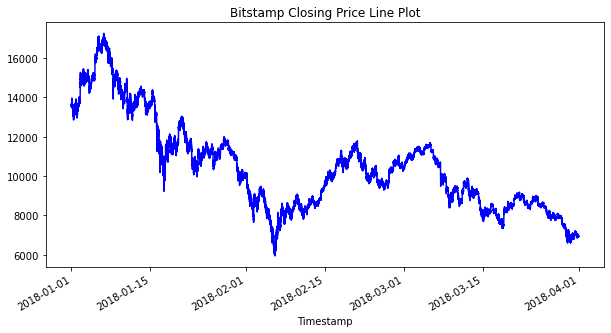

In [191]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp.loc[:, "Close"].plot(figsize=(10, 5), title="Bitstamp Closing Price Line Plot", color="blue")

<AxesSubplot:title={'center':'Coinbase Closing Price Line Plot'}, xlabel='Timestamp'>

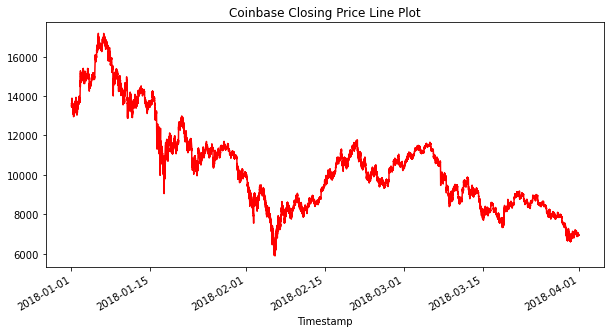

In [192]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase.loc[:, "Close"].plot(figsize=(10, 5), title="Coinbase Closing Price Line Plot", color="red")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase Closing Price Line Plot'}, xlabel='Timestamp'>

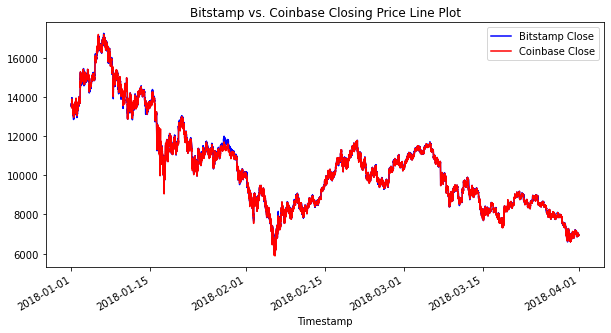

In [190]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp.loc[:, "Close"].plot(legend=True, figsize=(10, 5), title="Bitstamp vs. Coinbase Closing Price Line Plot", label="Bitstamp Close", color="blue")
coinbase.loc[:, "Close"].plot(legend=True, figsize=(10, 5), label="Coinbase Close", color="red")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase Closing Price Line Plot'}, xlabel='Timestamp'>

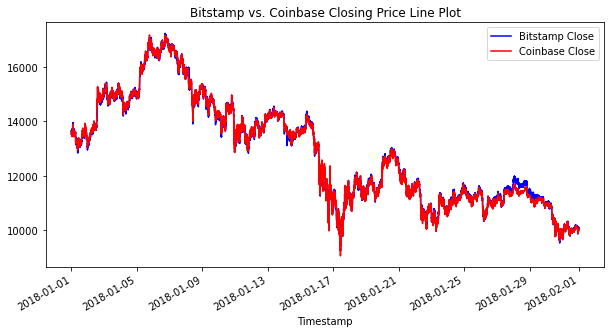

In [197]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp.loc[:, "Close"].loc['2018-01-01':'2018-01-31'].plot(legend=True, figsize=(10, 5), title="Bitstamp vs. Coinbase Closing Price Line Plot - Jan 2018", label="Bitstamp Close", color="blue")
coinbase.loc[:, "Close"].loc['2018-01-01':'2018-01-31'].plot(legend=True, figsize=(10, 5), label="Coinbase Close", color="red")



<AxesSubplot:title={'center':'Bitstamp vs. Coinbase Closing Price Line Plot Mar 2018'}, xlabel='Timestamp'>

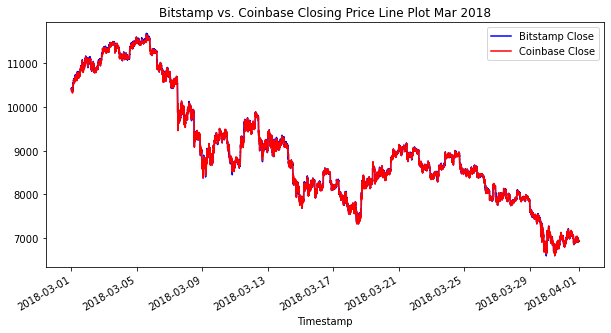

In [199]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp.loc[:, "Close"].loc['2018-03-01':'2018-03-31'].plot(legend=True, figsize=(10, 5), title="Bitstamp vs. Coinbase Closing Price Line Plot Mar 2018", label="Bitstamp Close", color="blue")
coinbase.loc[:, "Close"].loc['2018-03-01':'2018-03-31'].plot(legend=True, figsize=(10, 5), label="Coinbase Close", color="red")




**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** YES, The spread was greater earlier in the timeframe (greater in Jan 2018 than in Mar 2018)

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase Closing Price Line Plot Jan 28 2018'}, xlabel='Timestamp'>

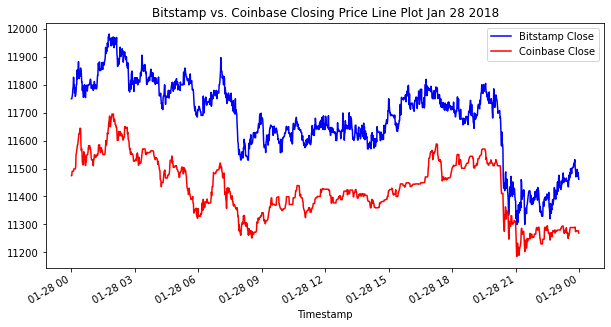

In [200]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp.loc[:, "Close"].loc['2018-01-28'].plot(legend=True, figsize=(10, 5), title="Bitstamp vs. Coinbase Closing Price Line Plot Jan 28 2018", label="Bitstamp Close", color="blue")
coinbase.loc[:, "Close"].loc['2018-01-28'].plot(legend=True, figsize=(10, 5), label="Coinbase Close", color="red")


In [206]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp.loc[:, "Close"].loc['2018-01-28'] - coinbase.loc[:, "Close"].loc['2018-01-28']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase Arbitrage Spread for Jan 2018'}>

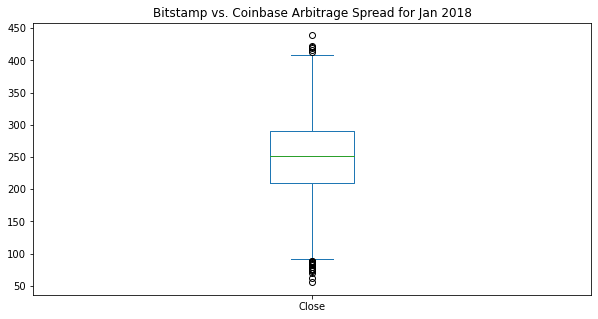

In [207]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind="box", figsize=(10, 5), title="Bitstamp vs. Coinbase Arbitrage Spread for Jan 28 2018")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase Closing Price Line Plot Feb 14 2018'}, xlabel='Timestamp'>

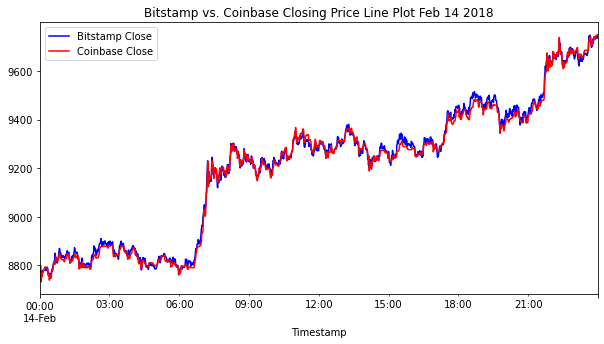

In [204]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp.loc[:, "Close"].loc['2018-02-14'].plot(legend=True, figsize=(10, 5), title="Bitstamp vs. Coinbase Closing Price Line Plot Feb 14 2018", label="Bitstamp Close", color="blue")
coinbase.loc[:, "Close"].loc['2018-02-14'].plot(legend=True, figsize=(10, 5), label="Coinbase Close", color="red")


In [208]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp.loc[:, "Close"].loc['2018-02-14'] - coinbase.loc[:, "Close"].loc['2018-02-14']

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1440.000000
mean        6.716861
std        15.037548
min       -33.620000
25%        -3.637500
50%         7.080000
75%        17.012500
max        65.190000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase Arbitrage Spread for Feb 14 2018'}>

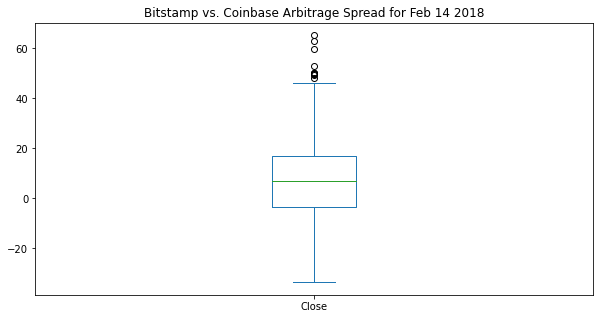

In [209]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind="box", figsize=(10, 5), title="Bitstamp vs. Coinbase Arbitrage Spread for Feb 14 2018")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase Closing Price Line Plot Mar 28 2018'}, xlabel='Timestamp'>

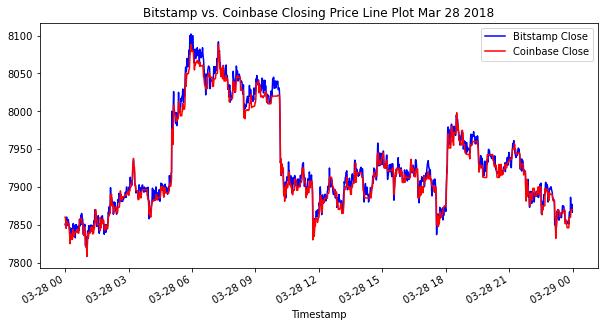

In [210]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp.loc[:, "Close"].loc['2018-03-28': '2018-03-28'].plot(legend=True, figsize=(10, 5), title="Bitstamp vs. Coinbase Closing Price Line Plot Mar 28 2018", label="Bitstamp Close", color="blue")
coinbase.loc[:, "Close"].loc['2018-03-28': '2018-03-28'].plot(legend=True, figsize=(10, 5), label="Coinbase Close", color="red")




In [211]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp.loc[:, "Close"].loc['2018-03-28': '2018-03-28'] - coinbase.loc[:, "Close"].loc['2018-03-28': '2018-03-28']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1438.00000
mean        4.42427
std         7.44509
min       -26.30000
25%        -0.48000
50%         4.53500
75%         8.99000
max        28.73000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase Arbitrage Spread for Mar 28 2018'}>

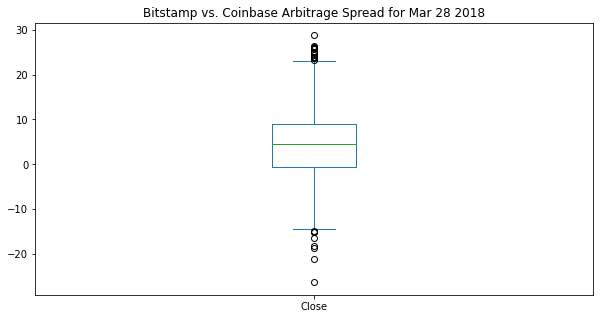

In [212]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind="box", figsize=(10, 5), title="Bitstamp vs. Coinbase Arbitrage Spread for Mar 28 2018")

In [251]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitstamp.loc[:, "Close"].loc['2018-01-28'] - coinbase.loc[:, "Close"].loc['2018-01-28']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early.describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

In [264]:
# Middle Period
arbitrage_spread_middle = bitstamp.loc[:, "Close"].loc['2018-02-14'] - coinbase.loc[:, "Close"].loc['2018-02-14']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_middle.describe()

count    1440.000000
mean        6.716861
std        15.037548
min       -33.620000
25%        -3.637500
50%         7.080000
75%        17.012500
max        65.190000
Name: Close, dtype: float64

In [265]:
# Late Period
arbitrage_spread_late = bitstamp.loc[:, "Close"].loc['2018-03-28'] - coinbase.loc[:, "Close"].loc['2018-03-28']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_late.describe()

count    1438.00000
mean        4.42427
std         7.44509
min       -26.30000
25%        -0.48000
50%         4.53500
75%         8.99000
max        28.73000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [254]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).

# Early Period
spread_return_early = arbitrage_spread_early[arbitrage_spread_early>0] / bitstamp['Close'].loc['2018-01-28']
spread_return_early.head()


Timestamp
2018-01-28 00:00:00    0.023437
2018-01-28 00:01:00    0.023404
2018-01-28 00:02:00    0.022857
2018-01-28 00:03:00    0.023377
2018-01-28 00:04:00    0.024971
Name: Close, dtype: float64

In [266]:
# Middle Period

spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle>0] / bitstamp['Close'].loc['2018-02-14']
spread_return_middle.head()

Timestamp
2018-02-14 00:00:00         NaN
2018-02-14 00:01:00         NaN
2018-02-14 00:02:00    0.000208
2018-02-14 00:03:00         NaN
2018-02-14 00:04:00    0.003172
Name: Close, dtype: float64

In [267]:
# Late Period

spread_return_late = arbitrage_spread_late[arbitrage_spread_late>0] / bitstamp['Close'].loc['2018-03-28']
spread_return_late.head()

Timestamp
2018-03-28 00:00:00         NaN
2018-03-28 00:01:00         NaN
2018-03-28 00:02:00         NaN
2018-03-28 00:03:00    0.001120
2018-03-28 00:04:00    0.000777
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [257]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs

# Early Period
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-28 00:00:00    0.023437
2018-01-28 00:01:00    0.023404
2018-01-28 00:02:00    0.022857
2018-01-28 00:03:00    0.023377
2018-01-28 00:04:00    0.024971
Name: Close, dtype: float64

In [268]:
# Middle Period
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

# Review the first five profitable trades
profitable_trades_middle.head()

Series([], Name: Close, dtype: float64)

In [269]:
# Late Period
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [272]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%

# Early Period
profitable_trades_early.describe()

count    1377.000000
mean        0.021700
std         0.005179
min         0.010006
25%         0.018666
50%         0.021711
75%         0.024784
max         0.037082
Name: Close, dtype: float64

In [262]:
# Middle Period
profitable_trades_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [261]:
# Late Period
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [275]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased

# Early Period
profit_early = profitable_trades_early * bitstamp['Close'].loc['2018-01-28']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early.head()

Timestamp
2018-01-28 00:00:00    275.38
2018-01-28 00:01:00    275.00
2018-01-28 00:02:00    268.77
2018-01-28 00:03:00    275.03
2018-01-28 00:04:00    294.26
Name: Close, dtype: float64

In [280]:
# Middle Period
profit_middle = profitable_trades_middle * bitstamp['Close'].loc['2018-02-14']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the early profit DataFrame
profit_per_trade_middle.head()

Series([], Name: Close, dtype: float64)

In [281]:
# Late Period
profit_late = profitable_trades_late * bitstamp['Close'].loc['2018-03-28']

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
profit_per_trade_late.head()

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [282]:
# Generate the summary statistics for the early profit per trade DataFrame

# Early Period
profit_per_trade_early.describe()

count    1377.000000
mean      254.033275
std        61.966468
min       113.970000
25%       217.400000
50%       254.190000
75%       292.990000
max       439.010000
Name: Close, dtype: float64

In [285]:
# Middle Period
profit_per_trade_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [286]:
# Late Period
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit per Trade bitstamp vs. coinbase Arbitrage Jan 28 2018'}, xlabel='Timestamp'>

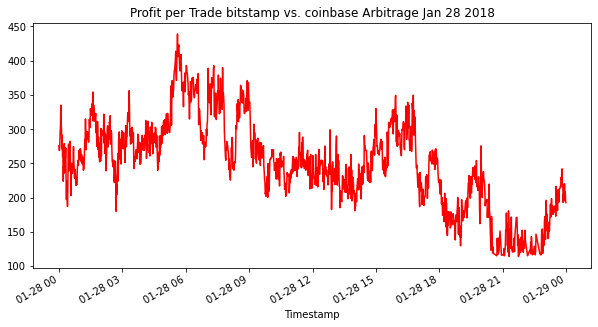

In [291]:
# Plot the results for the early profit per trade DataFrame

# Early Period
profit_per_trade_early.plot(figsize=(10, 5), title="Profit per Trade bitstamp vs. coinbase Arbitrage Jan 28 2018", color="red")

<AxesSubplot:title={'center':'Profit per Trade bitstamp vs. coinbase Arbitrage Feb 14 2018'}, xlabel='Timestamp'>

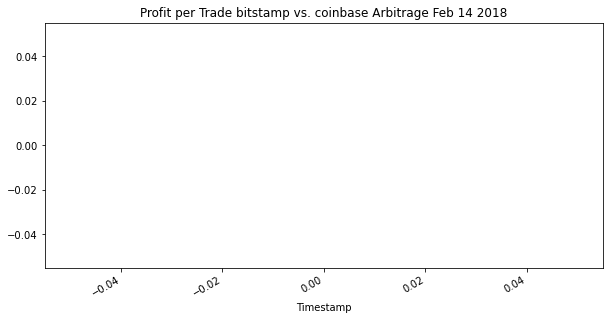

In [292]:
# Middle Period
profit_per_trade_middle.plot(figsize=(10, 5), title="Profit per Trade bitstamp vs. coinbase Arbitrage Feb 14 2018", color="red")

<AxesSubplot:title={'center':'Profit per Trade bitstamp vs. coinbase Arbitrage Mar 28 2018'}, xlabel='Timestamp'>

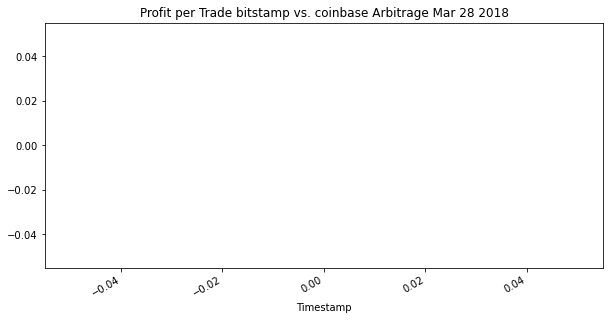

In [293]:
# Late Period
profit_per_trade_late.plot(figsize=(10, 5), title="Profit per Trade bitstamp vs. coinbase Arbitrage Mar 28 2018", color="red")

In [302]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame

# Early Period
profit_per_trade_early.sum()

349803.8200000001

In [300]:
# Middle Period
profit_per_trade_middle.sum()

0.0

In [301]:
# Late Period
profit_per_trade_late.sum()

0.0

In [304]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame

# Early Period
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_early

Timestamp
2018-01-28 00:00:00       275.38
2018-01-28 00:01:00       550.38
2018-01-28 00:02:00       819.15
2018-01-28 00:03:00      1094.18
2018-01-28 00:04:00      1388.44
                         ...    
2018-01-28 23:55:00    349012.22
2018-01-28 23:56:00    349207.33
2018-01-28 23:57:00    349416.07
2018-01-28 23:58:00    349611.19
2018-01-28 23:59:00    349803.82
Name: Close, Length: 1377, dtype: float64

<AxesSubplot:title={'center':'Cumulative Profit per Trade bitstamp vs. coinbase Arbitrage Jan 28 2018'}, xlabel='Timestamp'>

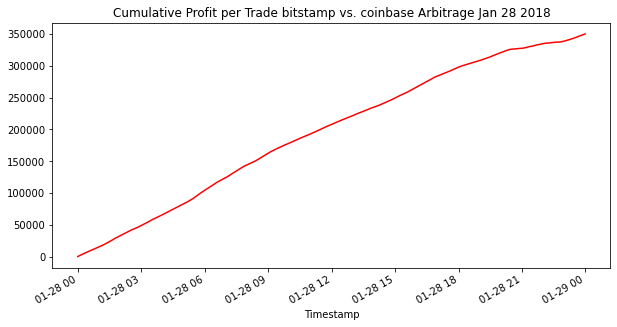

In [306]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame

# Early Period
cumulative_profit_early.plot(figsize=(10, 5), title="Cumulative Profit per Trade bitstamp vs. coinbase Arbitrage Jan 28 2018", color="red")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** YES. There was a clear profit opportunity in the early period, but no profit opportunity in the later periods. This seems to be related to the fact that arbitragers took the opportunity out of the market through their trading activity, reducing the spread between the exchanges by exploiting the opportunities.